**Import Libraries**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Additional libraries for working with CNNs and image data
import cv2  # OpenCV for image processing (loading, resizing, etc.)
from sklearn.model_selection import train_test_split  # For data splitting


**Load Dataset**

In [7]:
from google.colab import files
uploaded = files.upload()  #importing the csv file 

Saving DATA.csv to DATA (4).csv


In [8]:
import pandas as pd

# My file is named 'DATA.csv'
df = pd.read_csv('DATA.csv')
df.head()

,Date,Open,High,Low,Close,Volume,NASDAQ,NYSE,S&P 500,FTSE100,...,RUSSELL2000,HENG SENG,SSE,Crude Oil,Gold,VIX,USD index,Amazon,Google,Microsoft
0,2010/7/1,9.082143,9.100000,8.686429,8.874286,1022896000,2101.360107,6462.029785,1027.369995,4805.75,...,604.760010,NaN,2373.791992,72.949997,1206.300049,32.860001,84.72,110.959999,110.959999,23.160000
1,2010/7/2,8.946072,8.961785,8.685715,8.819285,693842800,2091.790039,6434.810059,1022.580017,4838.09,...,598.969971,19905.32031,2382.900879,72.139999,1207.400024,30.120001,84.43,109.139999,109.139999,23.270000
2,2010/7/6,8.964286,9.028571,8.791429,8.879642,615235600,2093.879883,6486.089844,1028.060059,4965.00,...,590.030029,20084.11914,2409.424072,71.980003,1194.800049,29.650000,84.08,110.059998,110.059998,23.820000
3,2010/7/7,8.946072,9.241786,8.919642,9.238214,654556000,2159.469971,6685.779785,1060.270020,5014.82,...,611.659973,19857.07031,2421.116943,74.070000,1198.599976,26.840000,83.82,113.430000,113.430000,24.299999
4,2010/7/8,9.374286,9.389286,9.103214,9.217500,738144400,2175.399902,6755.810059,1070.250000,5105.45,...,620.270020,20050.56055,2415.149902,75.440002,1195.800049,25.709999,83.82,116.220001,116.220001,24.410000


**Data Preprocessing**

Epoch 1/50


<ipython-input-9-4d2e750af795>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.dropna(inplace=True)


42/42 [==============================] - 1s 3ms/step - loss: 0.0528 - mse: 0.0528 - mae: 0.1491
Epoch 2/50
42/42 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0210
Epoch 3/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0201
Epoch 4/50
42/42 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0195
Epoch 5/50
42/42 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0194
Epoch 6/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0191
Epoch 7/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0192
Epoch 8/50
42/42 [==============================] - 0s 2ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0190
Epoch 9/50
42/42 [==============================] - 0s 3ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0184
Epoch 10/50
42/42 [=============================

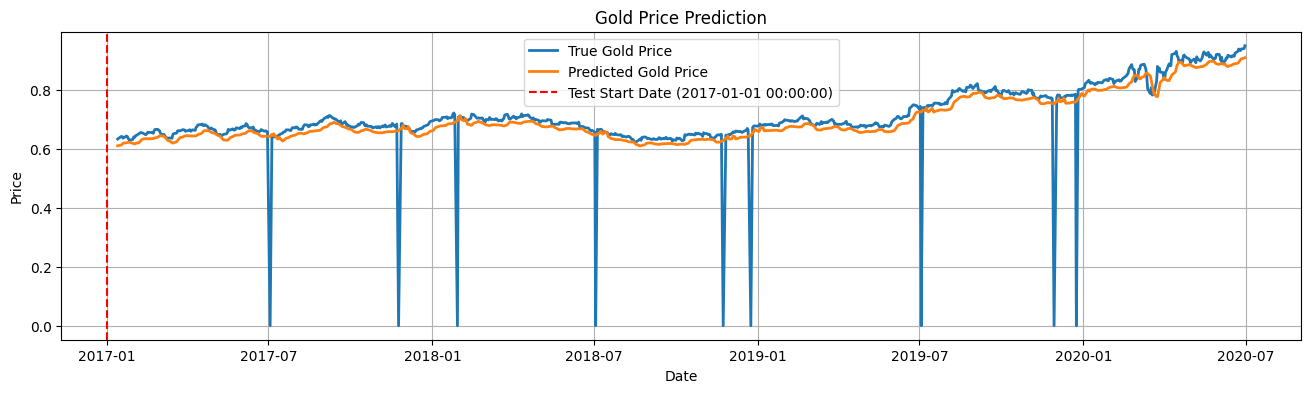

In [9]:
#Data preprocessing 

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Choose your target variable (e.g., 'Gold') and date range
target = 'Gold'
train_start_date = pd.to_datetime(datetime.date(2010, 7, 1))
train_end_date = pd.to_datetime(datetime.date(2017, 1, 1))
test_start_date = train_end_date

# Filter Data Based on Date Range
train_data = df[(df['Date'] >= train_start_date) & (df['Date'] <= train_end_date)]
test_data = df[df['Date'] >= test_start_date]

# Section 1: Data Cleaning - Remove Rows with NaN Values
train_data.dropna(inplace=True)

# Section 2: Data Preprocessing - Scale the Target Variable (e.g., 'Gold')
sc = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = sc.fit_transform(train_data[[target]])

# Set the number of timesteps
timesteps = 8

# Create data sets where each sample has 8 timesteps and 1 output
x_train = []
y_train = []

for i in range(timesteps, len(train_data_scaled)):
    x_train.append(train_data_scaled[i - timesteps:i, 0])
    y_train.append(train_data_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Section 3: Build a CNN Model
model = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timesteps, 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

# Section 4: Train the CNN Model
model.fit(x_train, y_train, epochs=50, batch_size=32)

test_data_scaled = sc.transform(test_data[['Gold']])

x_test = []
y_test = []

# Assuming your test data has the same structure as the training data
for i in range(timesteps, len(test_data_scaled)):
    x_test.append(test_data_scaled[i - timesteps:i, 0])
    y_test.append(test_data_scaled[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# Make predictions on the test data
predictions = model.predict(x_test)

# Section 6: Evaluate Model (e.g., using mean_squared_error, mean_absolute_error, r2_score)
# Replace the evaluation code with your actual evaluation metrics based on your test data.

# Plot the predictions
plt.figure(figsize=(16, 4))
plt.plot(test_data['Date'][timesteps:], y_test, label='True ' + target + ' Price', linewidth=2)
plt.plot(test_data['Date'][timesteps:], predictions, label='Predicted ' + target + ' Price', linewidth=2)
plt.axvline(x=test_start_date, color='r', linestyle='--', label=f'Test Start Date ({test_start_date})')
plt.legend()
plt.title('Gold Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()



In [10]:
# Check for NaN values in the entire DataFrame
nan_count = df.isna().sum()

# Print the count of NaN values for each column
print(nan_count)

# Check if there are any NaN values in the entire DataFrame
if nan_count.sum() > 0:
    print("There are NaN values in the DataFrame.")
else:
    print("No NaN values found in the DataFrame.")


Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
NASDAQ           0
NYSE             0
S&P 500          0
FTSE100          3
NIKKI225       134
BSE SENSEX     127
RUSSELL2000      0
HENG SENG      112
SSE            170
Crude Oil        2
Gold             2
VIX              0
USD index        0
Amazon           0
Google           0
Microsoft        0
dtype: int64
There are NaN values in the DataFrame.


**Split Data to train and test**

In [11]:
# Convert train_end_date to a datetime object
train_end_date = pd.to_datetime(train_end_date)

# Manually split the data based on date
train_data = df[df['Date'] <= train_end_date]
test_data = df[df['Date'] > train_end_date]


**Data Preprossesing for time series forecasting**

In [12]:
# Use MinMaxScaler to scale the training_set
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(train_data[['Gold']])  # Assuming 'Gold' is the target variable

# Set the number of timesteps
timesteps = 8

# Create data sets where each sample has 8 timesteps and 1 output
x_train = []
y_train = []

for i in range(timesteps, len(training_set_scaled)):
    x_train.append(training_set_scaled[i - timesteps:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape input data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))

# Shuffle data if necessary (uncomment if needed)
# idx = np.random.permutation(len(x_train))
# x_train = x_train[idx]
# y_train = y_train[idx]

# Print the first two samples
print(x_train[0], y_train[0])
print(x_train[1], y_train[1])


[[0.63869332]
 [0.63927572]
 [0.63260448]
 [0.63461641]
 [0.63313394]
 [0.64044052]
 [0.63456347]
 [0.64239958]] 0.6389580559691559
[[0.63927572]
 [0.63260448]
 [0.63461641]
 [0.63313394]
 [0.64044052]
 [0.63456347]
 [0.64239958]
 [0.63895806]] 0.6396463214606183


**Evaluate Model**

Saving DATA.csv to DATA (5).csv
65/65 [==============================] - 0s 2ms/step


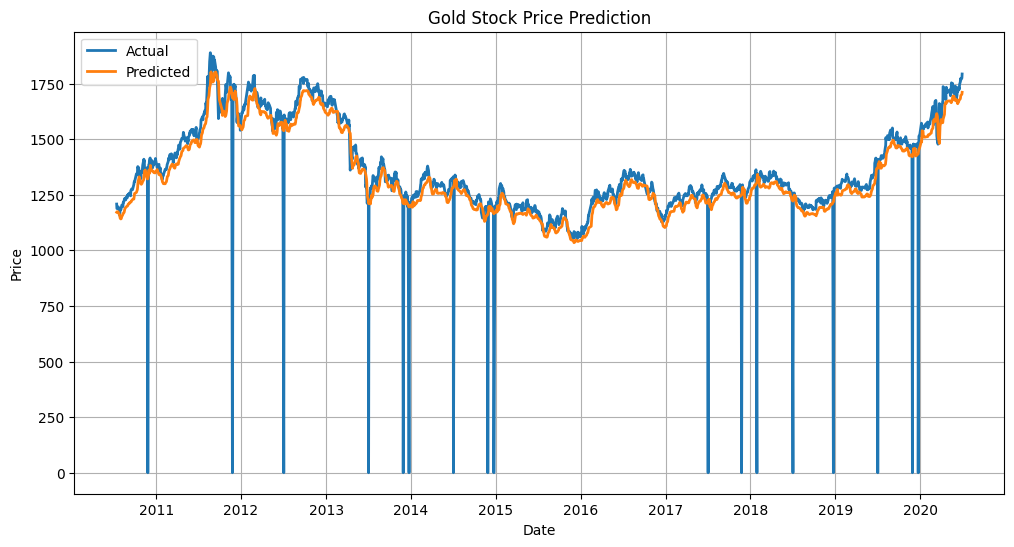

Mean Squared Error (MSE) for Gold: 16101.07
Mean Absolute Error (MAE) for Gold: 49.04
Root Mean Squared Error (RMSE) for Gold: 126.89
R-squared (R2) for Gold: 0.67
65/65 [==============================] - 0s 2ms/step


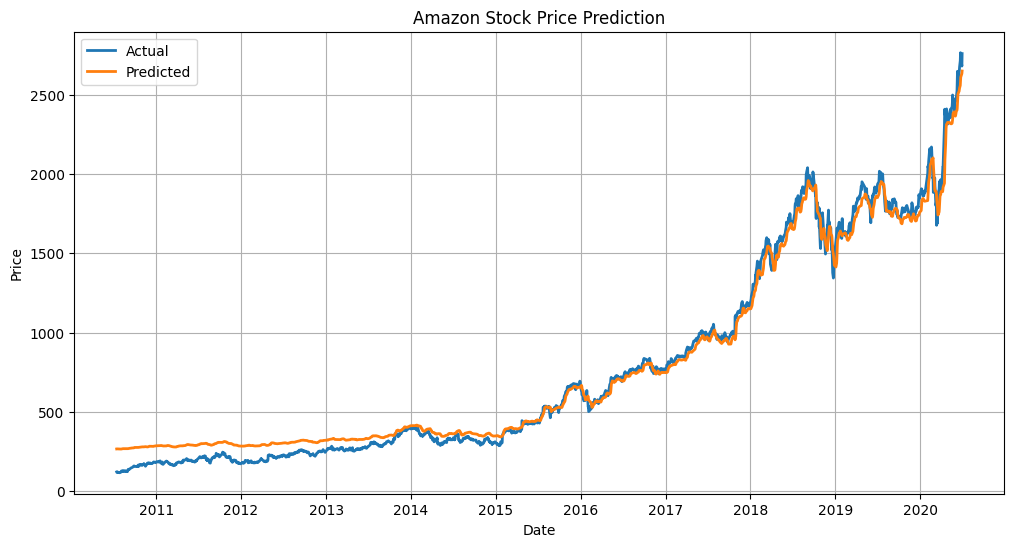

Mean Squared Error (MSE) for Amazon: 4682.86
Mean Absolute Error (MAE) for Amazon: 55.73
Root Mean Squared Error (RMSE) for Amazon: 68.43
R-squared (R2) for Amazon: 0.99
65/65 [==============================] - 0s 2ms/step


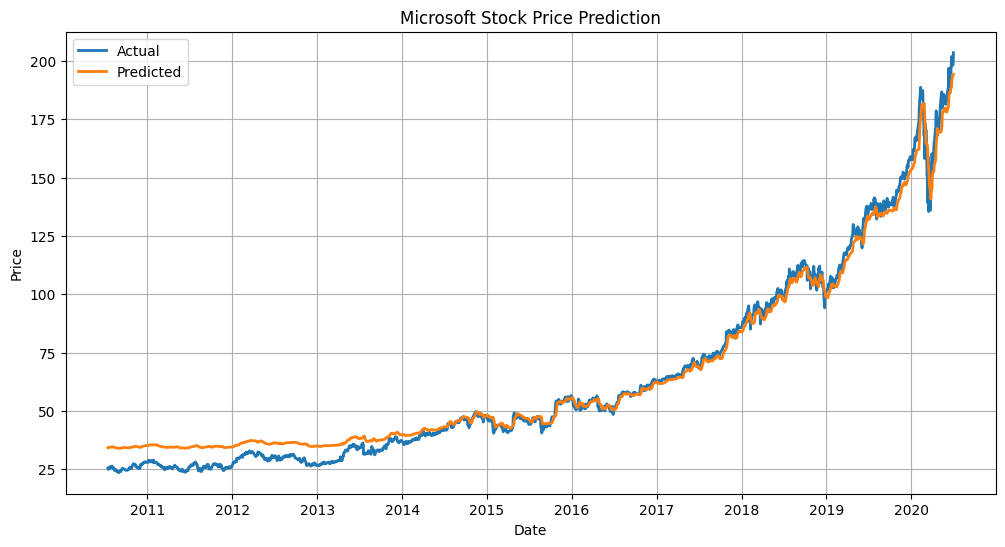

Mean Squared Error (MSE) for Microsoft: 25.38
Mean Absolute Error (MAE) for Microsoft: 3.93
Root Mean Squared Error (RMSE) for Microsoft: 5.04
R-squared (R2) for Microsoft: 0.99
65/65 [==============================] - 0s 2ms/step


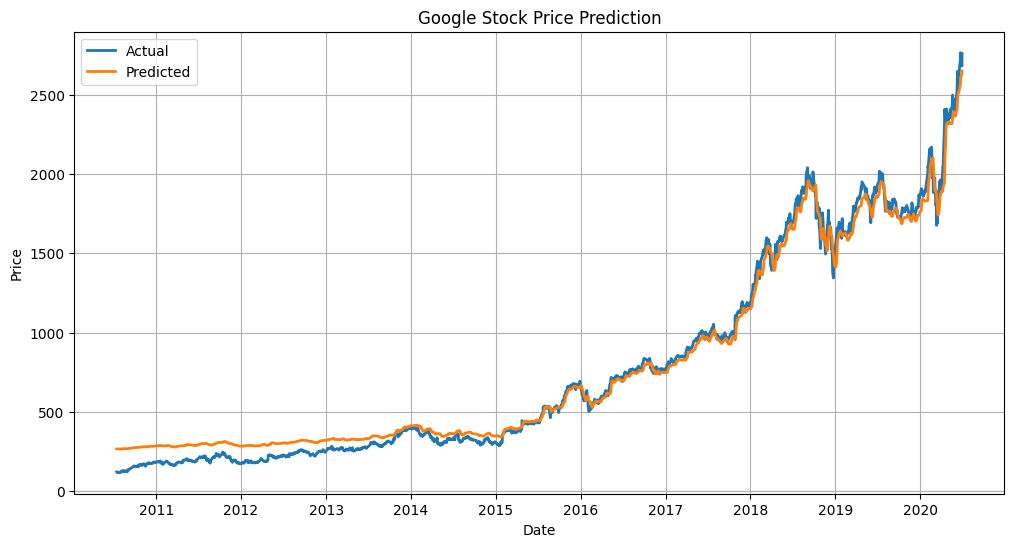

Mean Squared Error (MSE) for Google: 4682.86
Mean Absolute Error (MAE) for Google: 55.73
Root Mean Squared Error (RMSE) for Google: 68.43
R-squared (R2) for Google: 0.99
65/65 [==============================] - 0s 2ms/step


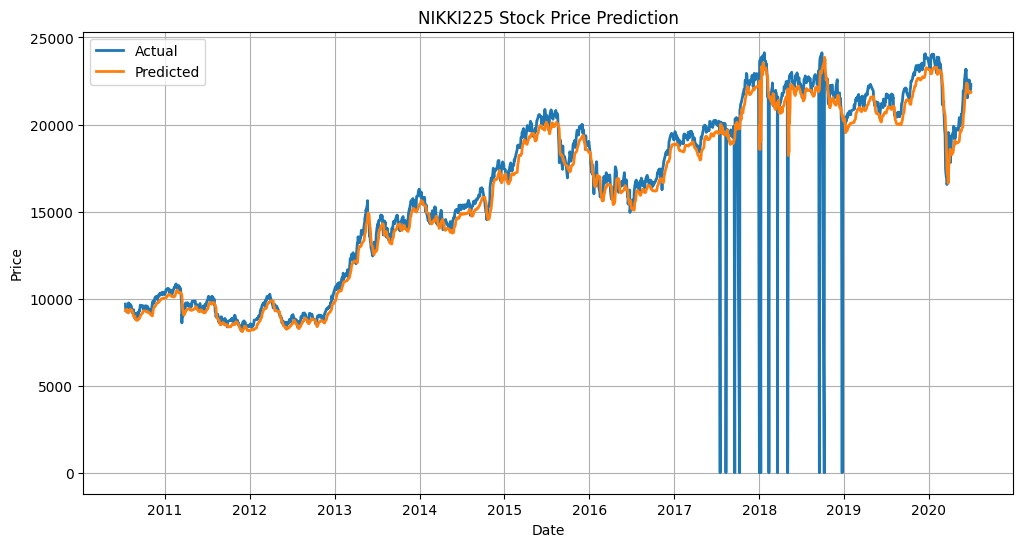

Mean Squared Error (MSE) for NIKKI225: 3396884.35
Mean Absolute Error (MAE) for NIKKI225: 656.20
Root Mean Squared Error (RMSE) for NIKKI225: 1843.06
R-squared (R2) for NIKKI225: 0.87
65/65 [==============================] - 0s 2ms/step


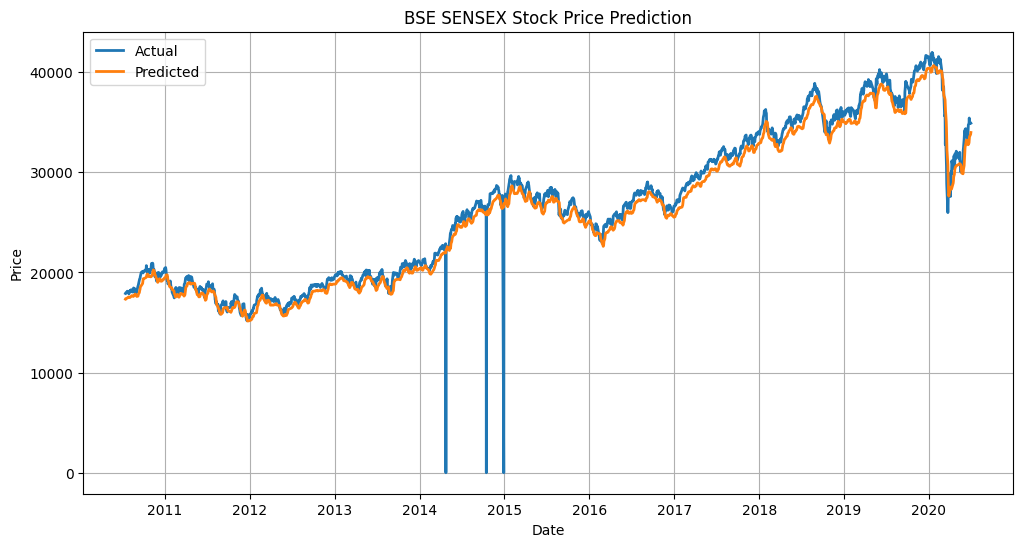

Mean Squared Error (MSE) for BSE SENSEX: 1749430.37
Mean Absolute Error (MAE) for BSE SENSEX: 819.05
Root Mean Squared Error (RMSE) for BSE SENSEX: 1322.66
R-squared (R2) for BSE SENSEX: 0.97
65/65 [==============================] - 0s 2ms/step


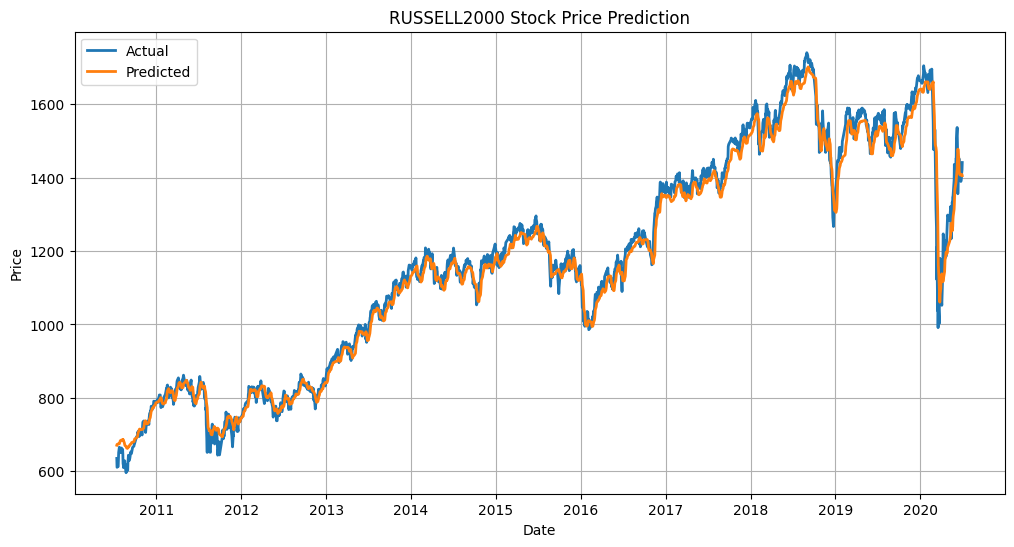

Mean Squared Error (MSE) for RUSSELL2000: 1098.17
Mean Absolute Error (MAE) for RUSSELL2000: 24.93
Root Mean Squared Error (RMSE) for RUSSELL2000: 33.14
R-squared (R2) for RUSSELL2000: 0.99
65/65 [==============================] - 0s 3ms/step


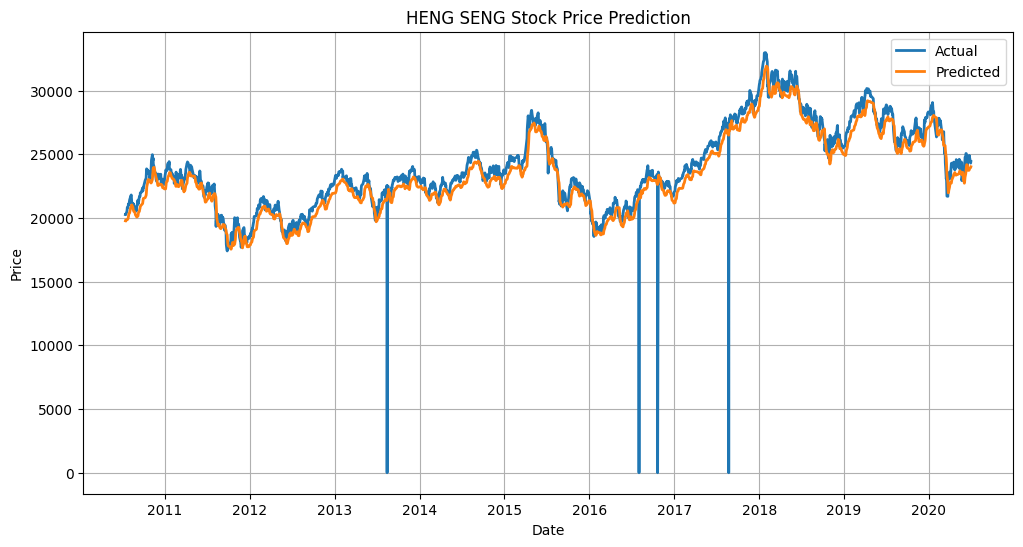

Mean Squared Error (MSE) for HENG SENG: 1668955.82
Mean Absolute Error (MAE) for HENG SENG: 736.10
Root Mean Squared Error (RMSE) for HENG SENG: 1291.88
R-squared (R2) for HENG SENG: 0.85
65/65 [==============================] - 0s 3ms/step


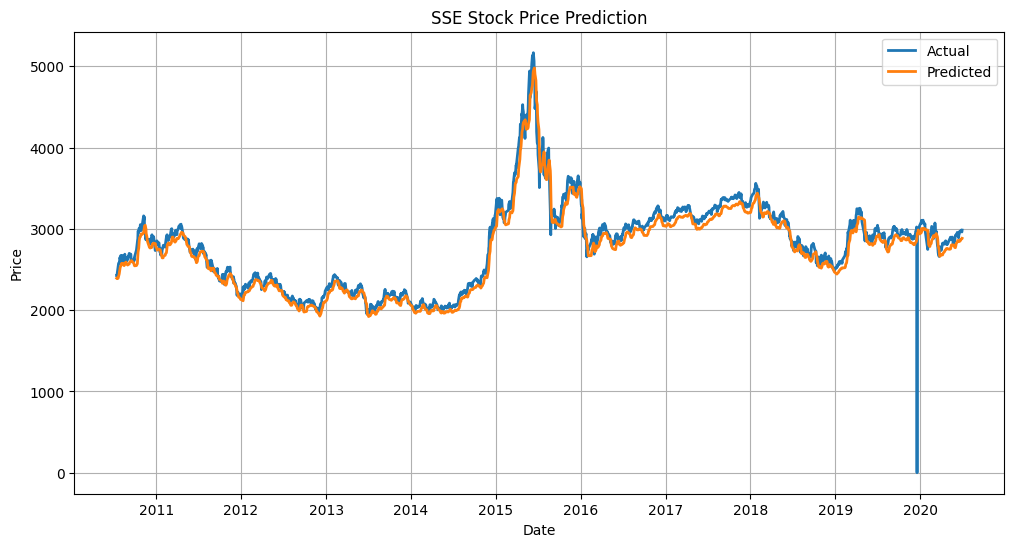

Mean Squared Error (MSE) for SSE: 15614.95
Mean Absolute Error (MAE) for SSE: 88.35
Root Mean Squared Error (RMSE) for SSE: 124.96
R-squared (R2) for SSE: 0.95
65/65 [==============================] - 0s 3ms/step


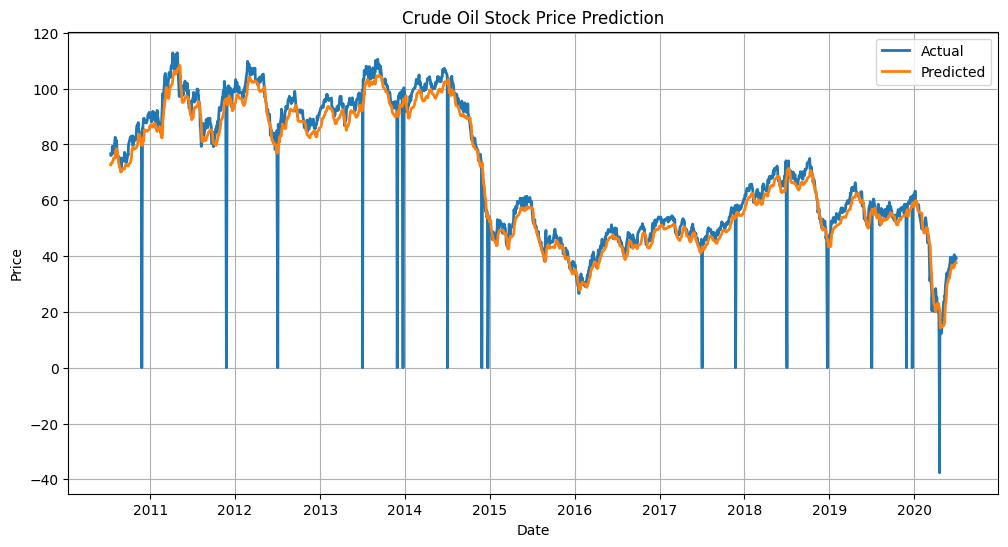

Mean Squared Error (MSE) for Crude Oil: 56.65
Mean Absolute Error (MAE) for Crude Oil: 3.65
Root Mean Squared Error (RMSE) for Crude Oil: 7.53
R-squared (R2) for Crude Oil: 0.90


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# My file is named 'DATA.csv'
data = pd.read_csv('DATA.csv')

# Data Preprocessing
# Rename columns (ensure they match the columns in your training data)
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'NASDAQ', 'NYSE', 'S&P 500', 'FTSE100', 'NIKKI225', 'BSE SENSEX', 'RUSSELL2000', 'HENG SENG', 'SSE', 'Crude Oil', 'Gold', 'VIX', 'USD index', 'Amazon', 'Google', 'Microsoft']

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Section 1: Data Cleaning - Remove Rows with NaN Values
data.dropna(inplace=True)

# Define the number of time steps
timesteps = 8  # Adjust as needed

# Define a function to make predictions for a given asset
def predict_asset(asset_name):
    # Create a new MinMaxScaler for the asset data
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Scale the asset data
    asset_data_scaled = scaler.fit_transform(data[[asset_name]])

    # Create sequences for the asset data
    x_asset = []
    y_asset = []

    for i in range(timesteps, len(asset_data_scaled)):
        x_asset.append(asset_data_scaled[i - timesteps:i, 0])
        y_asset.append(asset_data_scaled[i, 0])

    x_asset, y_asset = np.array(x_asset), np.array(y_asset)

    # Reshape input data
    x_asset = x_asset.reshape((x_asset.shape[0], x_asset.shape[1], 1))

    # Predict on the asset data
    asset_predictions = model.predict(x_asset)

    # Inverse transform the predictions to the original scale
    asset_predictions = scaler.inverse_transform(asset_predictions)

    return asset_predictions

# List of asset names you want to predict
asset_names = ['Gold', 'Amazon', 'Microsoft', 'Google', 'NIKKI225', 'BSE SENSEX', 'RUSSELL2000', 'HENG SENG', 'SSE', 'Crude Oil']  # Add more assets as needed

# Function to calculate and print evaluation metrics
def evaluate_predictions(actual, predicted, asset_name):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)

    print(f"Mean Squared Error (MSE) for {asset_name}: {mse:.2f}")
    print(f"Mean Absolute Error (MAE) for {asset_name}: {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE) for {asset_name}: {rmse:.2f}")
    print(f"R-squared (R2) for {asset_name}: {r2:.2f}")

# Build and compile the CNN model (modify this part based on your model architecture)
# model = ...

# Plot actual vs. predicted values and evaluate for each asset
for asset_name in asset_names:
    asset_predictions = predict_asset(asset_name)
    dates = data['Date'][timesteps:]
    actual_data = data[asset_name][timesteps:]

    plt.figure(figsize=(12, 6))
    plt.plot(dates, actual_data, label='Actual', linewidth=2)
    plt.plot(dates, asset_predictions, label='Predicted', linewidth=2)
    plt.title(f'{asset_name} Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Evaluate predictions for the asset
    evaluate_predictions(actual_data, asset_predictions, asset_name)
